# Using an unsupervised learning algorithm to help find patterns in unlabeled data

*In this case, the data is from a bank.
https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank/bank-full.csv

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Install kmodes if you have not yet
!pip install kmodes

# Import kmodes
from kmodes.kmodes import KModes


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Import Data**

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank/bank-full.csv", sep= ';')
# shows first 5 rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Trying to identify a customer using the combination of these columns:**
- age
- job
- marital
- education
- default
- housing
- loan
- balance


In [30]:
df = df[["age", "job", "marital", "education", "default", "housing", "loan", "balance"]]
# show first 5 rows of data
df.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


**Checking the shape of the DataFrame**

In [6]:
print("columns: ", df.shape[1])
print("rows: ", df.shape[0])

columns:  8
rows:  45211


**Checking for duplicates**

In [31]:
df.duplicated().sum()

np.int64(4163)

**Dropping duplicates** (because we want to get distinct customers)

In [32]:
df.drop_duplicates(inplace=True)

**Check for Null Value**

In [33]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
balance      0
dtype: int64

**Check data types**

In [34]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
balance       int64
dtype: object

**Convert all data types into category** (So that it is possible to use the K-Mode method)

In [35]:
# List categories
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Loop each element within the list to be changed into the type `category`
for columns in categories:
    df[columns] = df[columns].astype('category')


# Rechecking data types
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
housing      category
loan         category
balance         int64
dtype: object

**Check unique values of each categorical column**

In [36]:
for columns in categories:
    print(f'{columns}:')
    print(df[columns].unique())
    print('\n')

job:
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']


marital:
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


education:
['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


default:
['no', 'yes']
Categories (2, object): ['no', 'yes']


housing:
['yes', 'no']
Categories (2, object): ['no', 'yes']


loan:
['no', 'yes']
Categories (2, object): ['no', 'yes']




**Convert age from numerical into categorical** (with binning values and exploring the data visually)

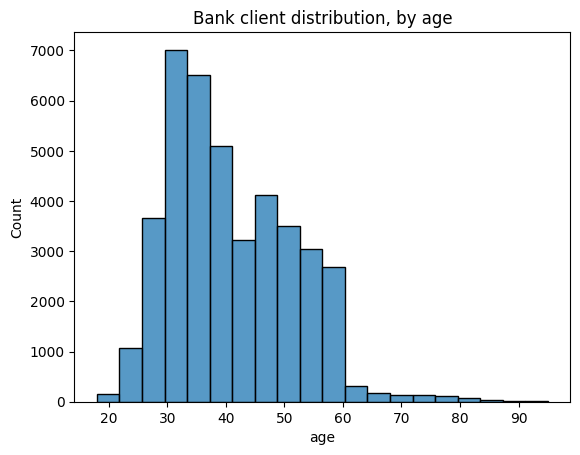

In [20]:
sns.histplot(data=df,
             x='age',
             bins=20
             )

plt.title("Bank client distribution, by age")

plt.ylabel('Count')

# Show the plot
plt.show()

**Clustering using K-Modes**
* to keep original data intact, we first copy the data over into a new dataframe

In [37]:
data_kmodes = df.copy()

data_kmodes.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


**Bin age column and input the result into a new column**

In [38]:
# Bin `age` column into 20 bins from 5 to 100, change type into category
data_kmodes['age_binned'] = pd.cut(data_kmodes['age'], bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]).astype('category')

# Drop age column
data_kmodes.drop('age', axis=1, inplace=True)

# test data by showing the first 5 rows
data_kmodes.head()

,job,marital,education,default,housing,loan,balance,age_binned
0,management,married,tertiary,no,yes,no,2143,"(55, 60]"
1,technician,single,secondary,no,yes,no,29,"(40, 45]"
2,entrepreneur,married,secondary,no,yes,yes,2,"(30, 35]"
3,blue-collar,married,unknown,no,yes,no,1506,"(45, 50]"
4,unknown,single,unknown,no,no,no,1,"(30, 35]"


**Bin Balance column and input the result into a new column**

In [39]:
# Bin 'Balance' column into 11 bins from 500 to 5000, change type into category
data_kmodes['balance_binned'] = pd.cut(data_kmodes['balance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]).astype('category')

# drop balance column
data_kmodes.drop('balance', axis=1, inplace=True)

data_kmodes.head()

,job,marital,education,default,housing,loan,age_binned,balance_binned
0,management,married,tertiary,no,yes,no,"(55, 60]","(2000, 2500]"
1,technician,single,secondary,no,yes,no,"(40, 45]","(0, 500]"
2,entrepreneur,married,secondary,no,yes,yes,"(30, 35]","(0, 500]"
3,blue-collar,married,unknown,no,yes,no,"(45, 50]","(1500, 2000]"
4,unknown,single,unknown,no,no,no,"(30, 35]","(0, 500]"


**Proving that all data is now category**

In [40]:
data_kmodes.dtypes

job               category
marital           category
education         category
default           category
housing           category
loan              category
age_binned        category
balance_binned    category
dtype: object

**One hot encoding**

In [41]:
data_kmodes.head()

,job,marital,education,default,housing,loan,age_binned,balance_binned
0,management,married,tertiary,no,yes,no,"(55, 60]","(2000, 2500]"
1,technician,single,secondary,no,yes,no,"(40, 45]","(0, 500]"
2,entrepreneur,married,secondary,no,yes,yes,"(30, 35]","(0, 500]"
3,blue-collar,married,unknown,no,yes,no,"(45, 50]","(1500, 2000]"
4,unknown,single,unknown,no,no,no,"(30, 35]","(0, 500]"


In [42]:
print(data_kmodes.shape)

(41048, 8)


Perform one hot encoding

In [43]:
data_kmodes = pd.get_dummies(data_kmodes, drop_first=True)
data_kmodes.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,"age_binned_(95, 100]","balance_binned_(500, 1000]","balance_binned_(1000, 1500]","balance_binned_(1500, 2000]","balance_binned_(2000, 2500]","balance_binned_(2500, 3000]","balance_binned_(3000, 3500]","balance_binned_(3500, 4000]","balance_binned_(4000, 4500]","balance_binned_(4500, 5000]"
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
print(data_kmodes.shape)

(41048, 46)


**Feed data into algorithm**

In [45]:
# Running the K-Modes algorithm for different numbers of clusters:

n_clusters = list(range(2, 9))
costs = []

# fix this code
for n in n_clusters:
    kmodes = KModes(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    kmodes.fit(data_kmodes)
    cost = kmodes.cost_
    costs.append(cost)

**plot simulation result of cost vs number of clusters**

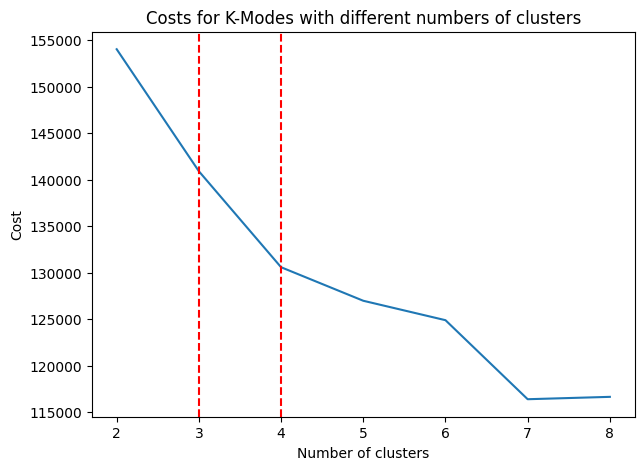

In [46]:
# Plotting the cost:

plt.figure(figsize=(7,5))
plt.plot(n_clusters, costs)
plt.axvline(3, linestyle='--', c='r')
plt.axvline(4, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Costs for K-Modes with different numbers of clusters')
plt.show()

**Label original data**

*Using the elbow method from the graph above, the amount of cluster chosen is 4.

In [47]:
kmodes = KModes(n_clusters=4, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-modes'] = kmodes.fit_predict(data_kmodes)

**Explore each variable from every cluster**

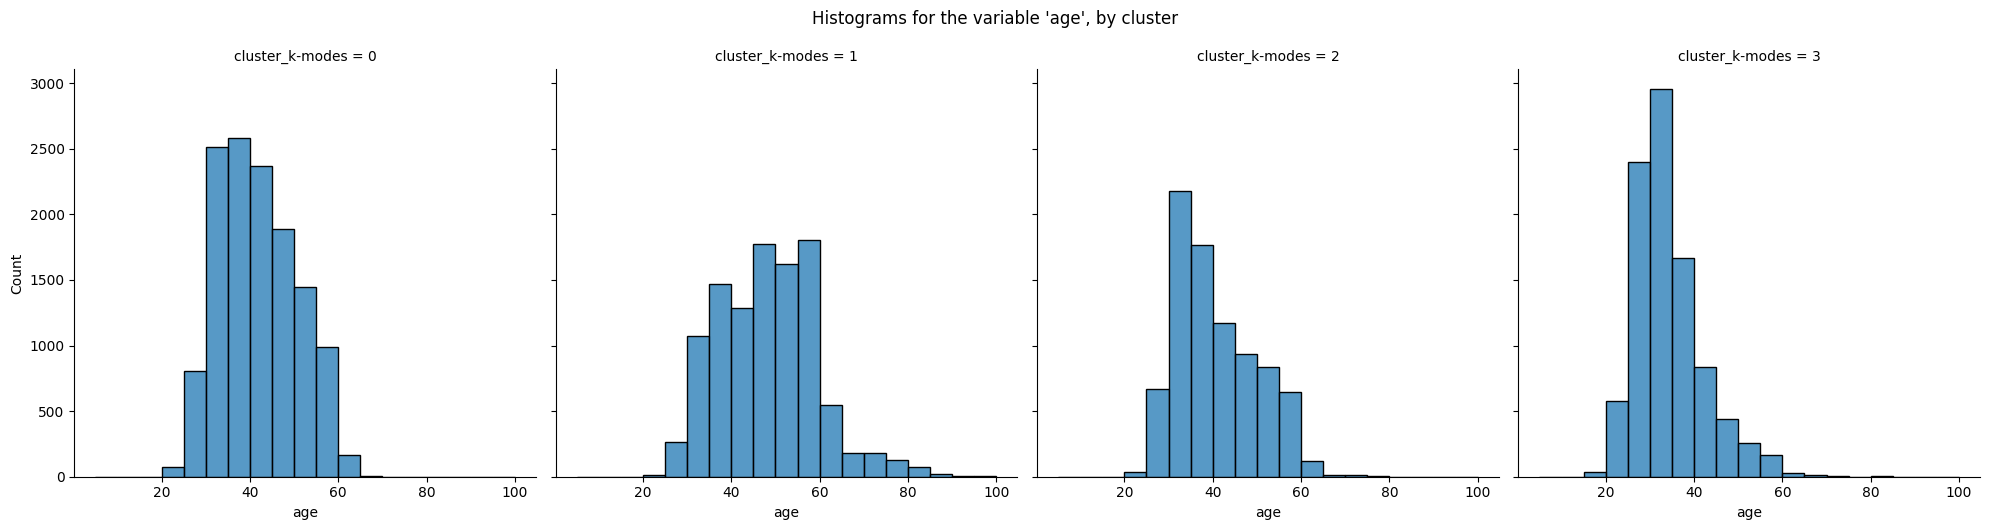

In [48]:
#Age
g = sns.displot(data=df,
                x='age',
                col='cluster_k-modes',
                bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
                )

g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)

plt.show()

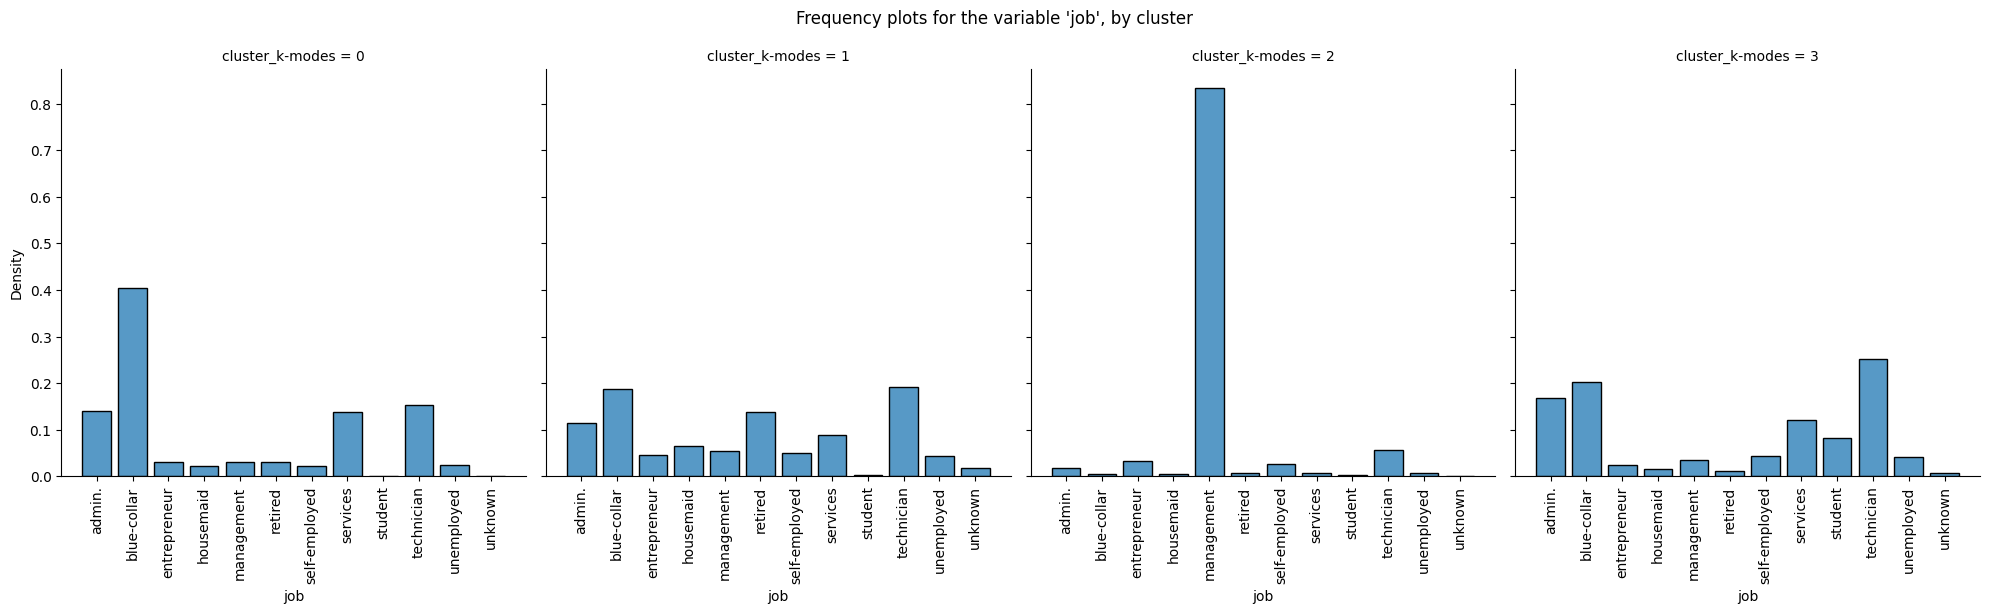

In [49]:
# Job
g = sns.displot(data=df,
                x='job',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)

plt.show()

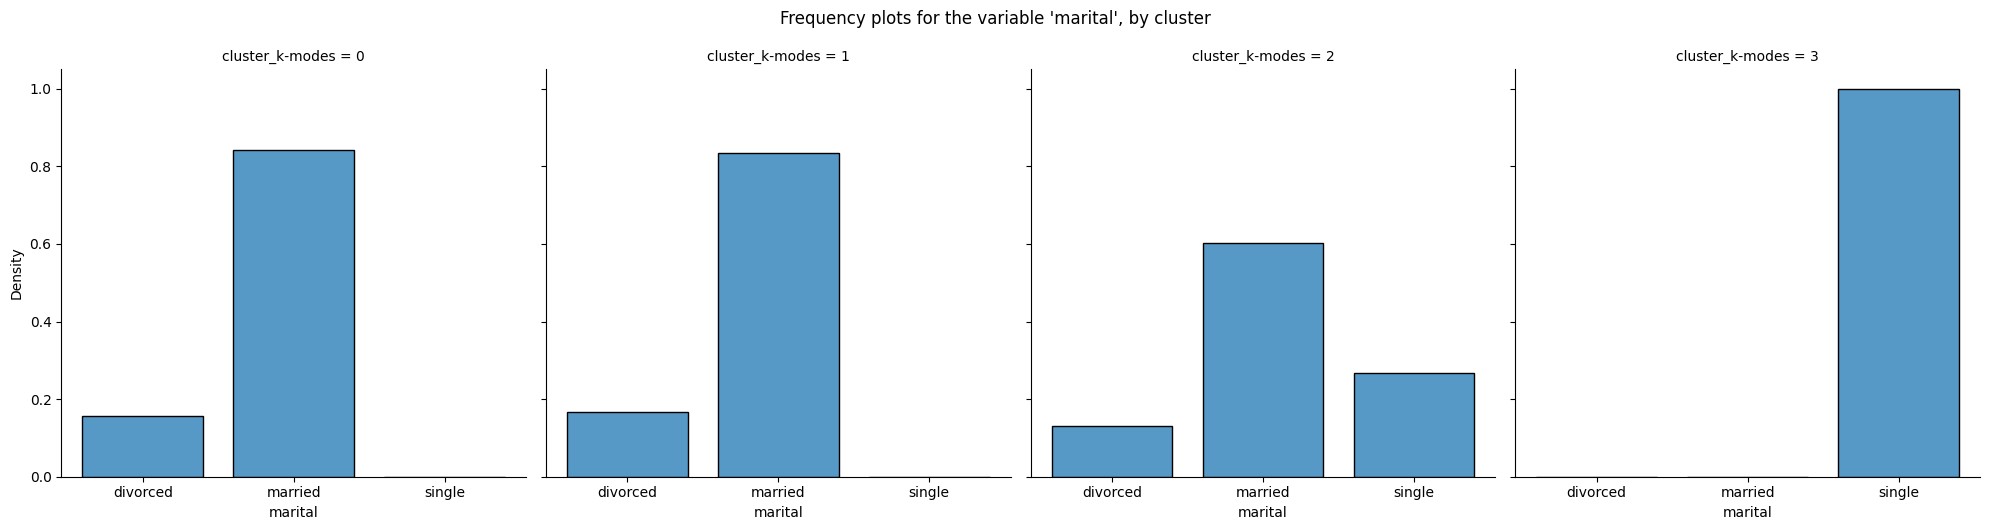

In [50]:
# Marital
g = sns.displot(data=df,
                x='marital',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)

plt.show()

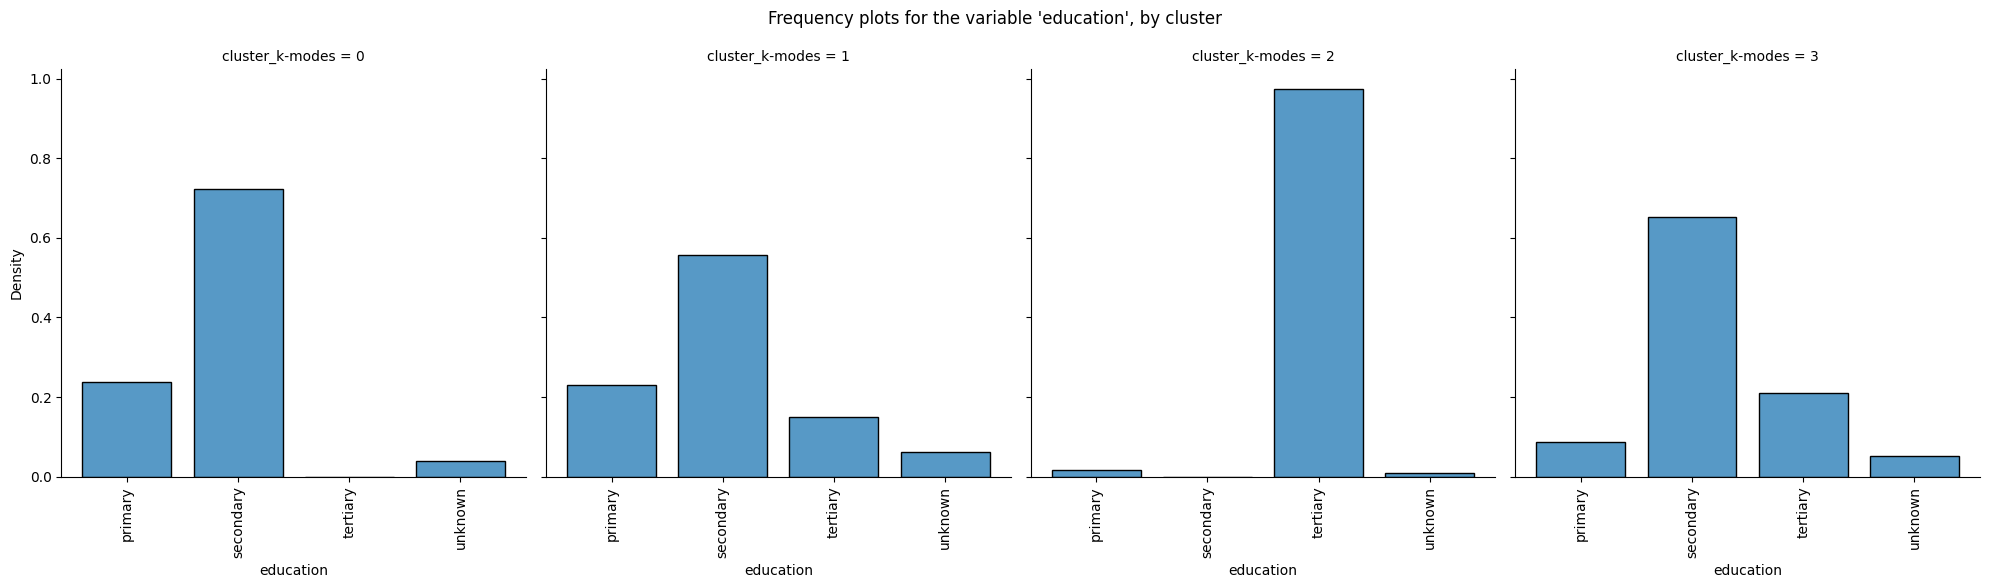

In [51]:
# Education
g = sns.displot(data=df,
                x='education',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)

plt.show()

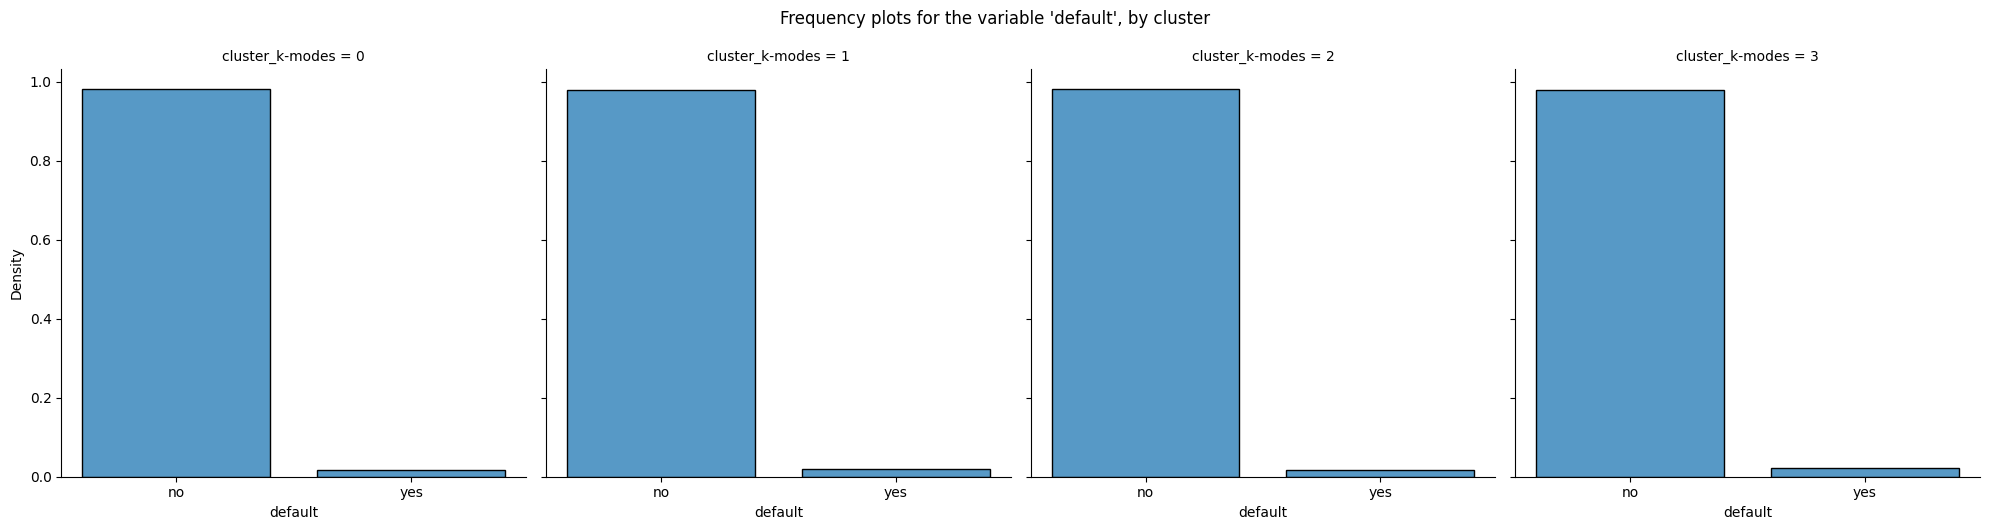

In [52]:
# Default
g = sns.displot(data=df,
                x='default',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'default', by cluster", y=1.05)

plt.show()

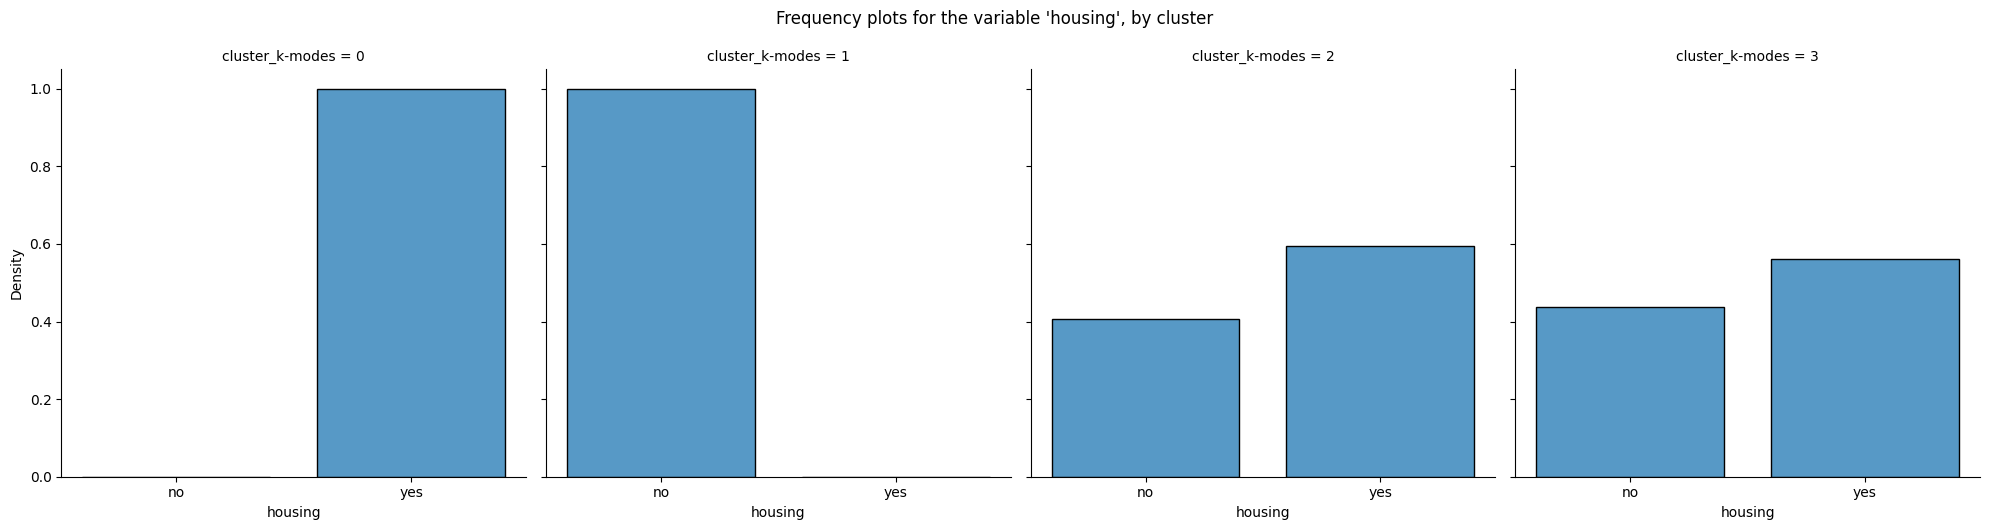

In [53]:
# Housing
g = sns.displot(data=df,
                x='housing',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)

plt.show()

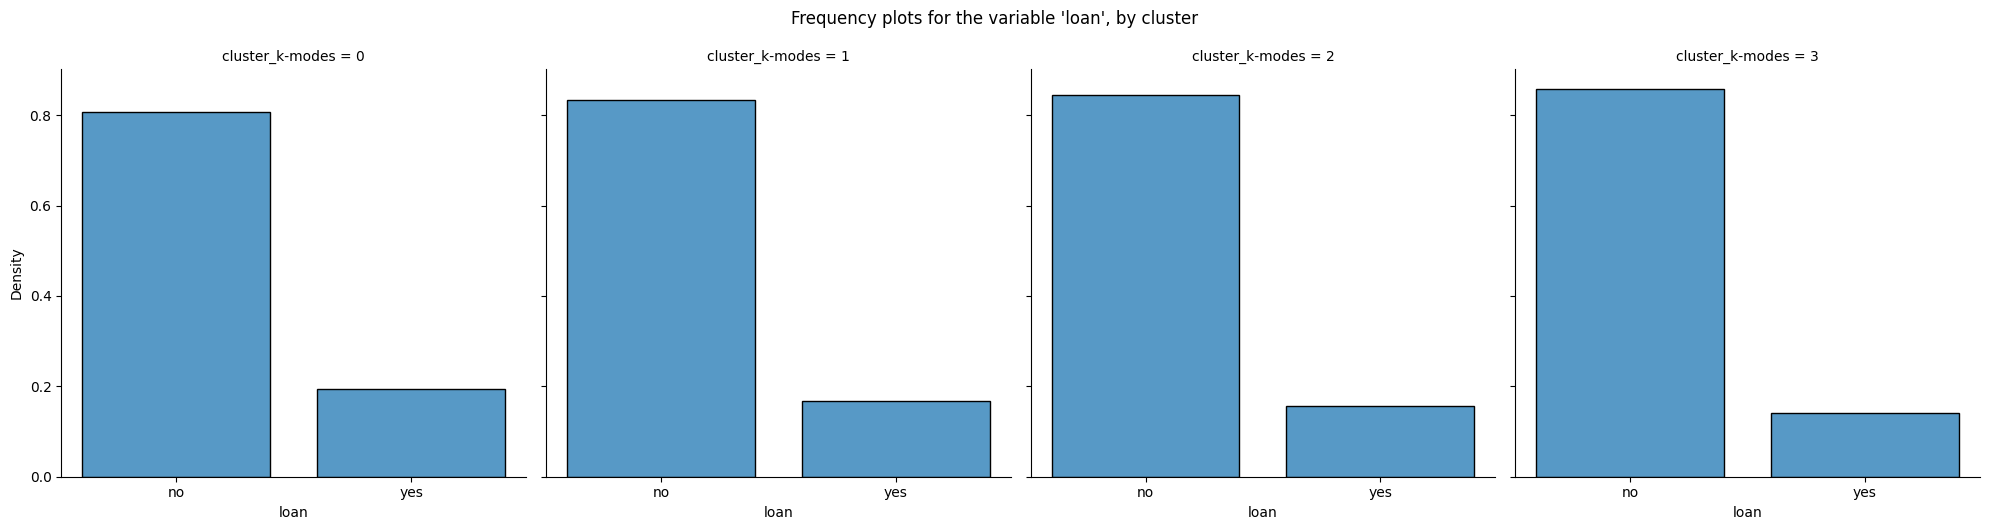

In [54]:
# Loan
g = sns.displot(data=df,
                x='loan',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)

plt.show()

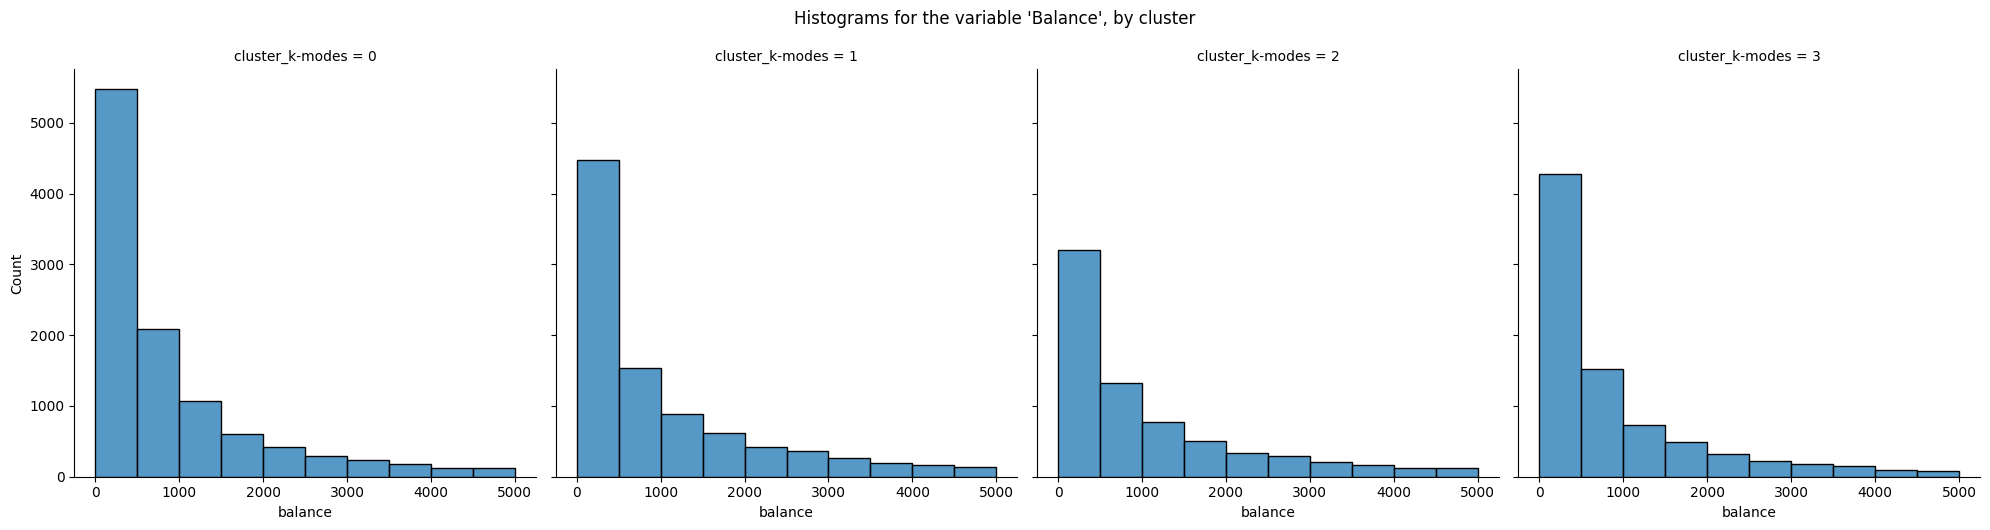

In [56]:
# Balance
g = sns.displot(data=df,
                x='balance',
                col='cluster_k-modes',
                bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
                )

g.fig.suptitle("Histograms for the variable 'Balance', by cluster", y=1.05)

plt.show()

**Data breakdown**
| Variable |1 |2 | 3| 4|
|-|-|-|-|-|
|`age`| 30-55 | 30-60 | 30-50 | 25-40 |
|`job`| blue-collar | technician, blue-collar, retired | management | technician, blue-collar, admin |
|`marital`| married | married | married | single |
|`education`| secondary | secondary | tertiary | secondary |
|`default`| no | no | no | no |
|`housing`| yes | no | yes, no | yes, no |
|`loan`| no | no | no | no |
|`balance`| 0-2500 | 0-2000 | 0-2000 | 0-2000 |

**Cluster 1**: Middle aged blue collar worker, is in a stable family condition with stable income

**Cluster 2**: Middle - high age group which consists of technicians, blue collar workers and retirees. Has financial freedom since they have no loans or housing.

**Cluster 3**: Consists of younger to middle-aged professionals in management roles, likely more educated and financially responsible, with mixed loan and housing status.

**Cluster 4**: Consists of younger, single individuals in administrative, technical, or blue-collar jobs, likely still building their financial foundation.


# Insight after day-2 session:
It has been very interesting to learn how to process a large amount of data. This is a relatively new thing for me, so I am still very eager to learn more. I would love to make a better representation of the balance column from this data, since the one im currently using doesn't really show much. Thanks Elektrifikasi 2024! 

-farrel fasilkom ui '24